# This called as naive reason is make a naive assumptions tht features using are indipendent from each others

In [133]:
import pandas as pd
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [134]:
df.drop(['PassengerId','Name','SibSp','Ticket','Parch','Cabin','Embarked'], axis='columns', inplace=True)

In [135]:
df

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [136]:
target = df.Survived
inputs = df.drop('Survived', axis='columns')

In [137]:
target


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [138]:
inputs

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [139]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [140]:
inputs = pd.concat([inputs,dummies], axis='columns')
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0


In [141]:
inputs.drop('Sex',axis='columns',inplace=True)
inputs.head(3)

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0


In [142]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [143]:
inputs.Age[0:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [144]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.Age[:10]

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

In [145]:
inputs.isnull().any()

Pclass    False
Age       False
Fare      False
female    False
male      False
dtype: bool

In [146]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs,target, test_size=0.2)


In [147]:
len(x_train)

712

In [148]:
len(x_test)

179

In [149]:
len(y_train)

712

In [150]:
len(x_test)

179

In [151]:
x_train

,Pclass,Age,Fare,female,male
164,3,1.000000,39.6875,0,1
167,3,45.000000,27.9000,1,0
184,3,4.000000,22.0250,1,0
114,3,17.000000,14.4583,1,0
679,1,36.000000,512.3292,0,1
...,...,...,...,...,...
516,2,34.000000,10.5000,1,0
322,2,30.000000,12.3500,1,0
180,3,29.699118,69.5500,1,0
221,2,27.000000,13.0000,0,1


# Naive Bayes (GaussianNB)

In [152]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [153]:
model.fit(x_train, y_train)

GaussianNB()

In [154]:
model.score(x_test,y_test)

0.7541899441340782

In [155]:
x_test[:10]

,Pclass,Age,Fare,female,male
765,1,51.000000,77.9583,1,0
216,3,27.000000,7.9250,1,0
675,3,18.000000,7.7750,0,1
595,3,36.000000,24.1500,0,1
868,3,29.699118,9.5000,0,1
37,3,21.000000,8.0500,0,1
575,3,19.000000,14.5000,0,1
241,3,29.699118,15.5000,1,0
796,1,49.000000,25.9292,1,0
474,3,22.000000,9.8375,1,0


In [156]:
y_test[:10]

765    1
216    1
675    0
595    0
868    0
37     0
575    0
241    1
796    1
474    0
Name: Survived, dtype: int64

In [157]:
model.predict(x_test[:10])

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [158]:
y_predict = model.predict(x_test)

In [159]:
from sklearn.metrics import confusion_matrix
cm  = confusion_matrix(y_test, y_predict)
cm

array([[83, 17],
       [27, 52]], dtype=int64)

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(95.72222222222221, 0.5, 'Truth')

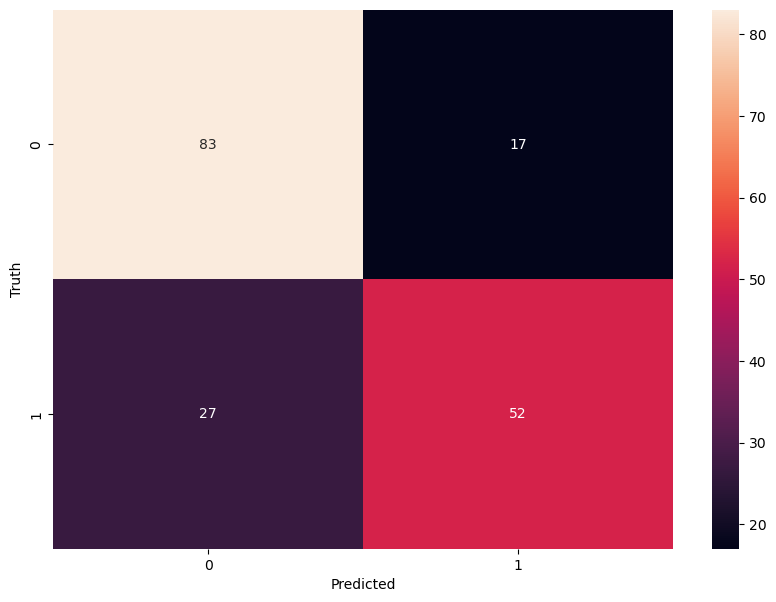

In [161]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")